In [53]:
from google.colab import drive
drive.mount("Gdrive")

Drive already mounted at Gdrive; to attempt to forcibly remount, call drive.mount("Gdrive", force_remount=True).


In [54]:
!ls


Gdrive	olist_products_dataset.csv  sample_data


In [66]:
olist_path = "Gdrive/MyDrive/ARTEFACT/OLIST"
olist_path + '/olist_products.csv'
! ls Gdrive/MyDrive/ARTEFACT/OLIST

olist_customers_dataset.csv	  olist_products_dataset.csv
olist_geolocation_dataset.csv	  olist_products_with_volume.csv
olist_order_items_dataset.csv	  olist_sellers_dataset.csv
olist_order_payments_dataset.csv  product_category_name_translation.csv
olist_order_reviews_dataset.csv   Untitled0.ipynb
olist_orders_dataset.csv	  Untitled1.ipynb


In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

olist_products = pd.read_csv (f'{olist_path}/olist_products_dataset.csv')

olist_products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
# Calculer le volume du produit et ajouter comme nouvelle colonne
olist_products['product_volume_cm3'] = olist_products['product_length_cm'] * olist_products['product_height_cm'] * olist_products['product_width_cm']

# Afficher les premières lignes pour confirmer l'ajout de la nouvelle colonne
olist_products[['product_length_cm', 'product_height_cm', 'product_width_cm', 'product_volume_cm3']].head()


,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,16.0,10.0,14.0,2240.0
1,30.0,18.0,20.0,10800.0
2,18.0,9.0,15.0,2430.0
3,26.0,4.0,26.0,2704.0
4,20.0,17.0,13.0,4420.0


Il y a 32,951 entrées dans le jeu de données, avec 9 colonnes.
La colonne product_category_name et les colonnes associées à la longueur du nom, la longueur de la description, et la quantité de photos du produit ont des valeurs manquantes, car elles ont moins de non-null count que le nombre total d'entrées.

Les types de données comprennent des objets (strings) pour les identifiants et noms de catégorie, et des nombres flottants pour les mesures et quantités.


Les variables numériques ont des gammes de valeurs variées, par exemple, le poids du produit (product_weight_g) varie de 0 à 40,425 grammes, et la quantité de photos (product_photos_qty) varie de 1 à 20.


In [38]:
olist_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0


In [39]:
olist_products.shape

(32951, 10)

In [40]:
olist_products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_volume_cm3'],
      dtype='object')

In [41]:
olist_products.index

RangeIndex(start=0, stop=32951, step=1)

In [42]:
olist_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,16564.096695
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,27057.041650
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,168.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2880.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,6840.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,18480.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,296208.000000


# Statistiques Descriptives Clés
Longueur du nom du produit (product_name_lenght): en moyenne 48.48 caractères, avec une variation de 5 à 76 caractères.

Longueur de la description du produit (product_description_lenght): en moyenne 771.50 caractères, indiquant que les descriptions sont assez détaillées, avec une variation de 4 à 3992 caractères.

Quantité de photos du produit (product_photos_qty): en moyenne 2.19 photos par produit, ce qui suggère que plusieurs produits ont plus d'une photo.

Dimensions et poids: les produits varient significativement en taille et en poids, indiquant une large gamme de types de produits dans cet ensemble de données.

# Visualistaion
Pour visualiser les distributions et les relations entre les variables numériques de notre jeu de données, nous allons utiliser la bibliothèque matplotlib pour créer des histogrammes et des boîtes à moustaches, et seaborn pour les scatter plots et la matrice de corrélation.


***Histogrammes*** pour visualiser la distribution des différentes variables numériques.

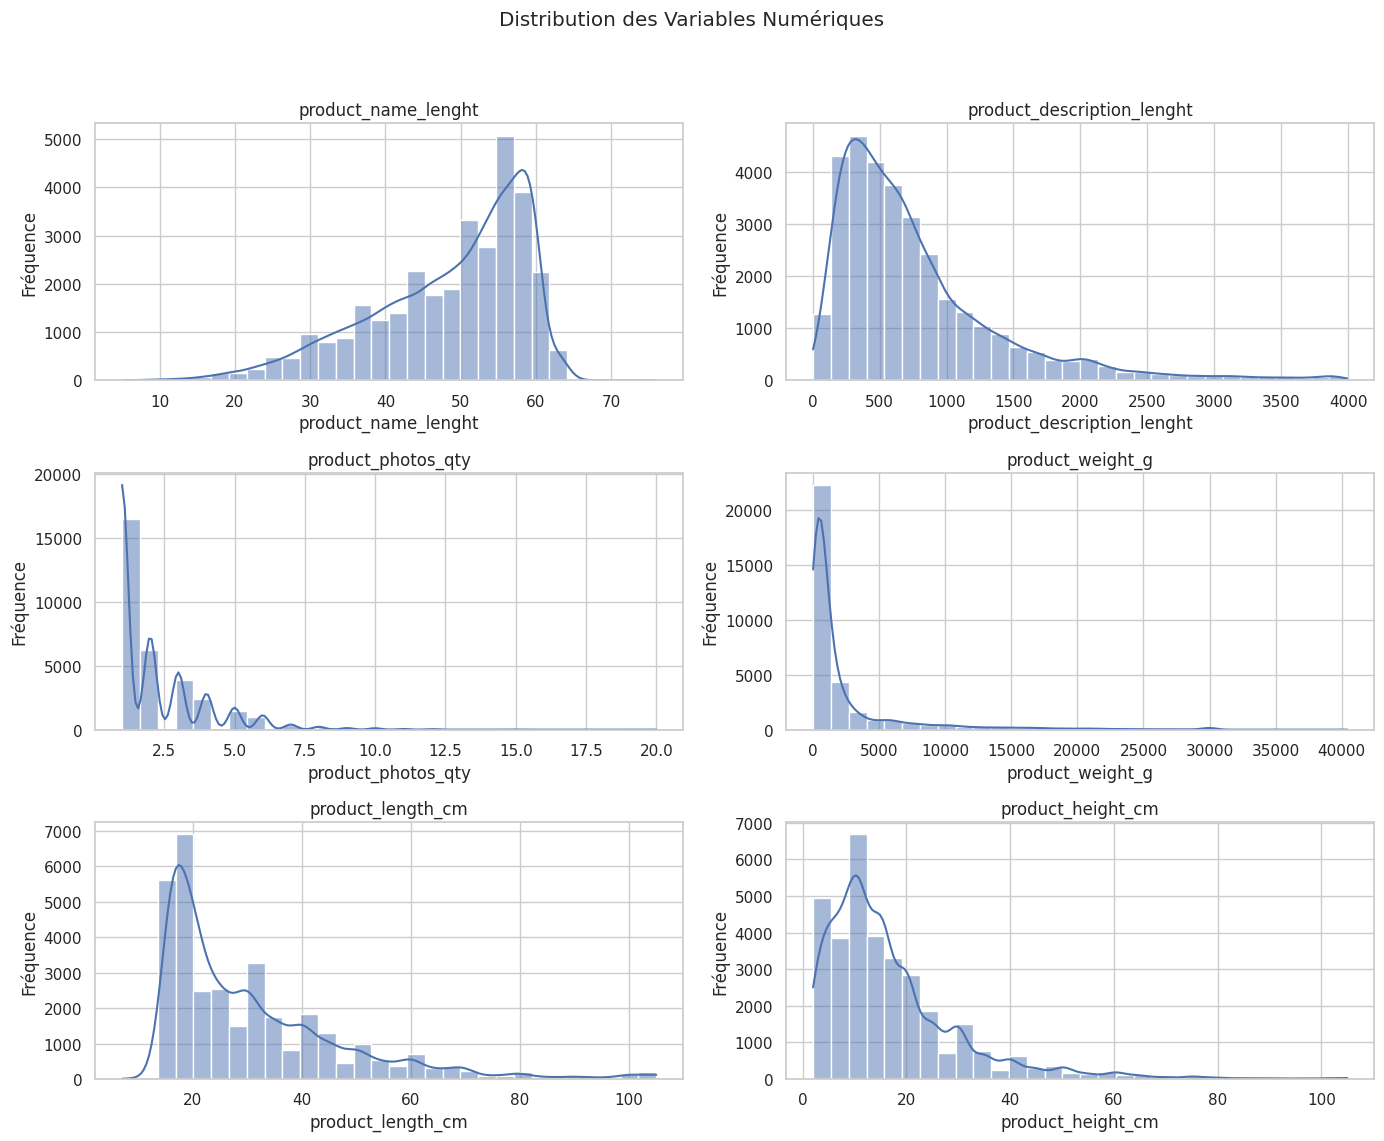

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le style des graphiques
sns.set(style="whitegrid")

# Préparation pour les visualisations - Histogrammes
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Distribution des Variables Numériques')

# Liste des colonnes numériques pour les histogrammes
num_columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
               'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for ax, column in zip(axes.flatten(), num_columns):
    sns.histplot(olist_products[column].dropna(), bins=30, ax=ax, kde=True)
    ax.set_title(column)
    ax.set_ylabel('Fréquence')

# Ajuster l'espacement
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


Les histogrammes ci-dessus montrent la distribution des différentes variables numériques dans le jeu de données. Par exemple, la longueur de la description du produit et le poids du produit ont des distributions étendues, tandis que la quantité de photos par produit semble être concentrée vers les valeurs plus faibles.


**Boîtes à moustaches (Boxplots)** pour observer la répartition et identifier les valeurs aberrantes dans les variables numériques.

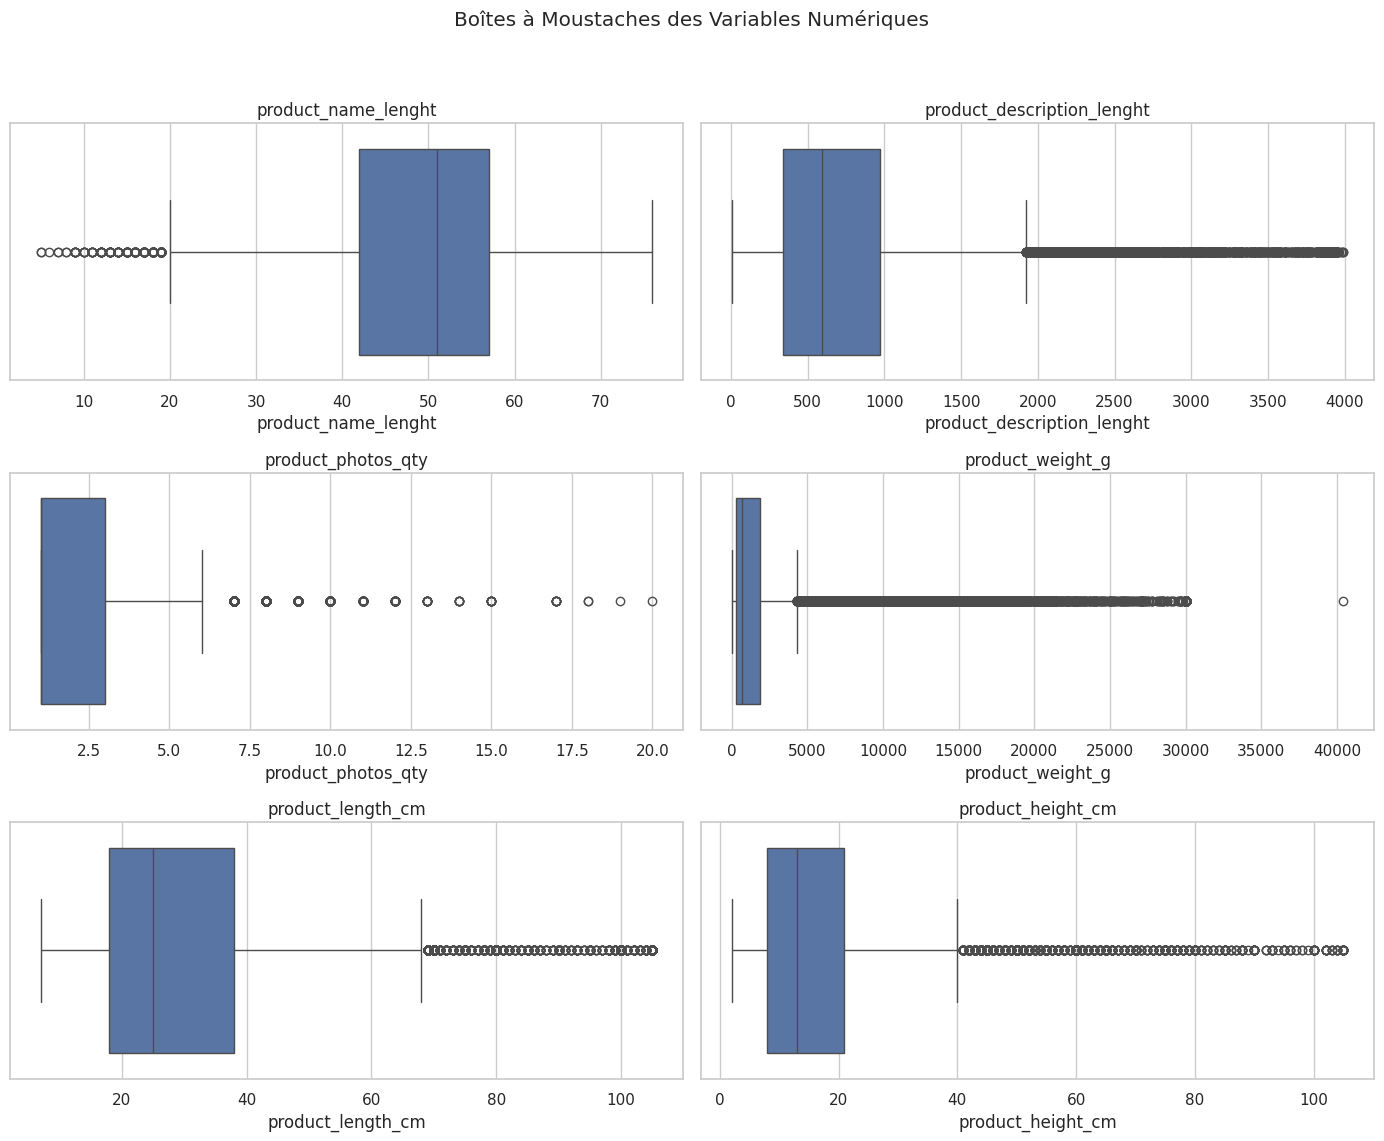

In [46]:
# Préparation pour les visualisations - Boîtes à moustaches
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Boîtes à Moustaches des Variables Numériques')

for ax, column in zip(axes.flatten(), num_columns):
    sns.boxplot(x=olist_products[column].dropna(), ax=ax)
    ax.set_title(column)

# Ajuster l'espacement
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


Les boîtes à moustaches révèlent la répartition des valeurs pour chaque variable numérique et mettent en évidence les valeurs aberrantes.

Par exemple, vous pouvez voir que le product_weight_g (poids du produit) et le product_description_length (longueur de la description du produit) présentent un grand nombre de valeurs aberrantes, indiquant une variété significative dans ces mesures.

**Scatter plots** pour examiner les relations entre les paires de variables numériques, en particulier en relation avec le poids du produit (product_weight_g) et ses dimensions (product_length_cm, product_height_cm, product_width_cm)

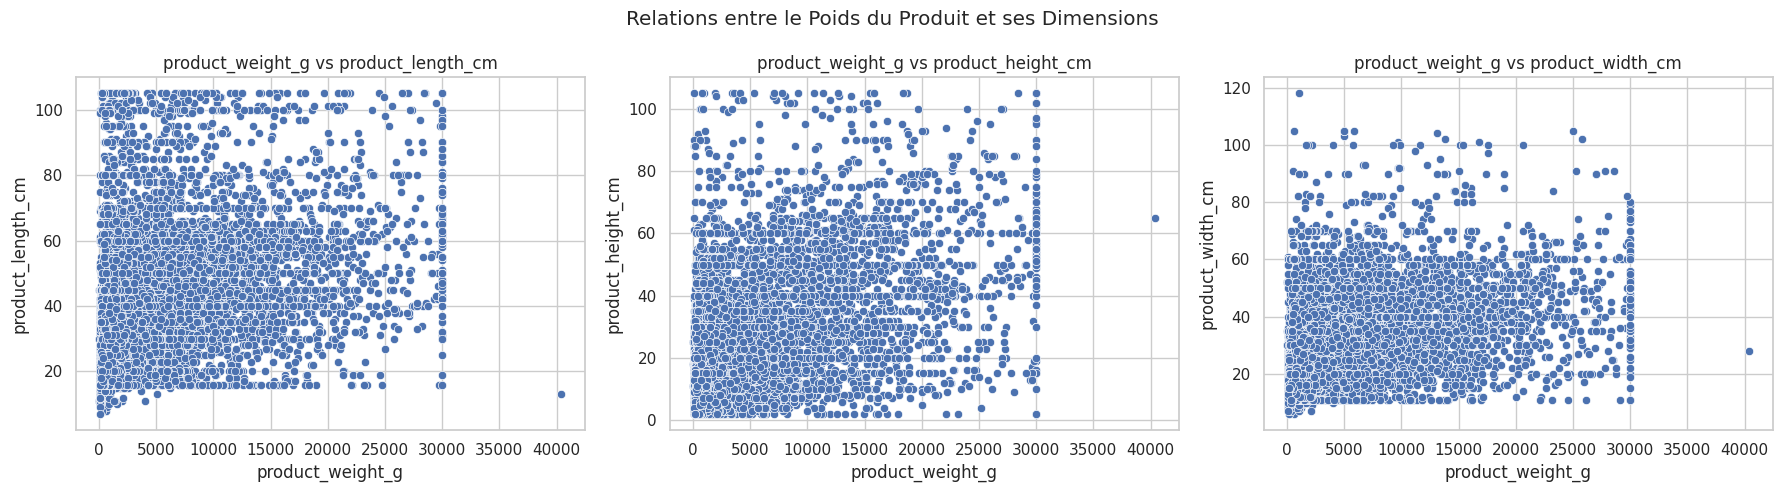

In [ ]:
# Préparation pour les visualisations - Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relations entre le Poids du Produit et ses Dimensions')

# Relations à visualiser
relations = [
    ('product_weight_g', 'product_length_cm'),
    ('product_weight_g', 'product_height_cm'),
    ('product_weight_g', 'product_width_cm')
]

for ax, (x, y) in zip(axes, relations):
    sns.scatterplot(data=olist_products, x=x, y=y, ax=ax)
    ax.set_title(f'{x} vs {y}')

plt.tight_layout()

plt.show()


Les scatter plots ci-dessus montrent les relations entre le poids du produit (product_weight_g) et ses dimensions (product_length_cm, product_height_cm, product_width_cm).

 Ces graphiques peuvent aider à identifier les tendances ou les relations linéaires entre le poids et les dimensions des produits. Par exemple, bien que certaines relations semblent dispersées, il est possible de distinguer une tendance générale où des dimensions plus grandes ou un poids plus élevé sont associés.

**Matrice de corrélation** pour évaluer la corrélation entre les variables numériques.

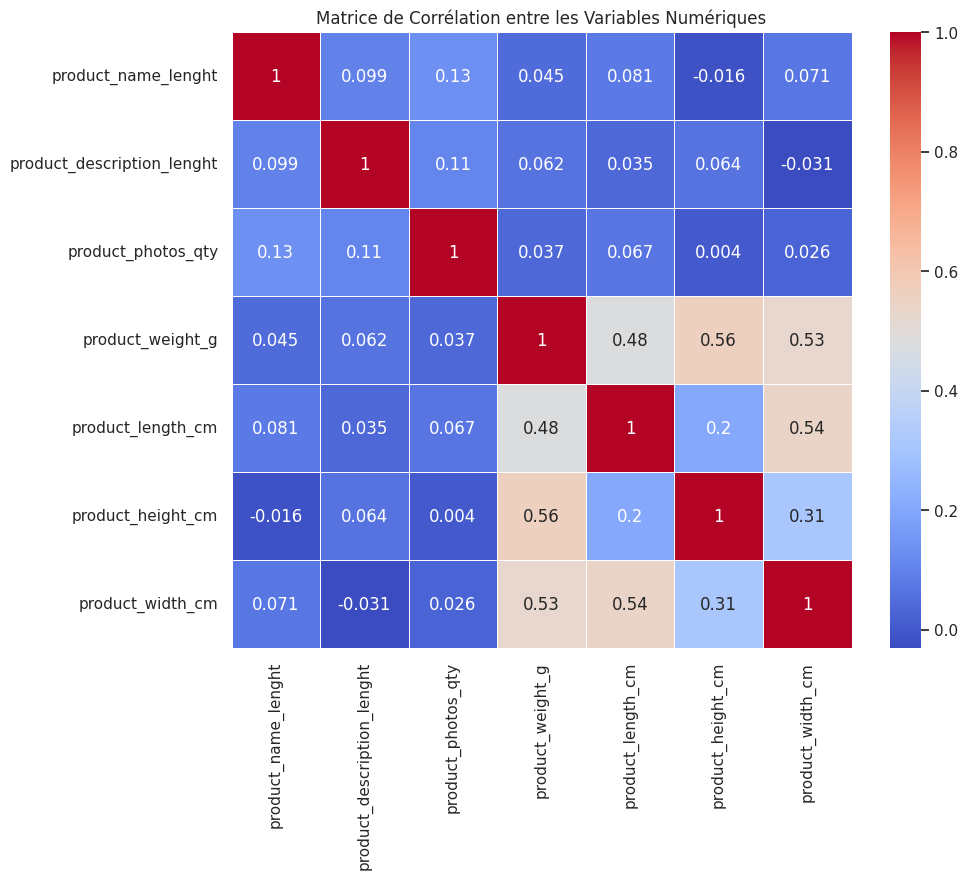

In [47]:
# Calcul de la matrice de corrélation
correlation_matrix = olist_products[num_columns].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation entre les Variables Numériques')
plt.show()


La matrice de corrélation ci-dessus montre les coefficients de corrélation entre les variables numériques de l'ensemble de données. Ces coefficients varient de -1 à 1, où 1 signifie une corrélation positive parfaite, -1 une corrélation négative parfaite, et 0 l'absence de corrélation.

